<a href="https://colab.research.google.com/github/mariotko9/mineracao_dados/blob/main/Chk__Min_Dad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# monta o drive para usar os dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# importa a bliblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
df = pd.read_csv('/content/drive/My Drive/pokemon.csv')

In [4]:
# Exibe quantidade de linhas (tuplas) e colunas
df.shape

(1194, 12)

In [5]:
# Resumo descritivo das colunas numéricas
df.describe()

,Dex No,BST,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,492.746231,441.206868,70.883585,80.948911,74.587102,72.881072,72.123953,69.782245
std,293.719541,121.015326,26.861740,32.126164,30.678626,32.702411,27.628412,30.200828
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,235.250000,330.000000,52.000000,56.000000,51.250000,50.000000,50.000000,45.000000
50%,486.500000,460.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,741.750000,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.750000
max,1010.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [9]:
# Resumo descritivo das colunas numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Dex No       1194 non-null   int64 
 1   Name         1194 non-null   object
 2   Base Name    1194 non-null   object
 3   Type 1       1194 non-null   object
 4   Type 2       1194 non-null   object
 5   BST          1194 non-null   int64 
 6   HP           1194 non-null   int64 
 7   Attack       1194 non-null   int64 
 8   Defense      1194 non-null   int64 
 9   Sp. Attack   1194 non-null   int64 
 10  Sp. Defense  1194 non-null   int64 
 11  Speed        1194 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 112.1+ KB


In [10]:
df.isnull().sum()

,0
Dex No,0
Name,0
Base Name,0
Type 1,0
Type 2,0
BST,0
HP,0
Attack,0
Defense,0
Sp. Attack,0


In [12]:
# Exibir 10 primeiros registros
df.head(10)

,Dex No,Name,Base Name,Type 1,Type 2,BST,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed
0,1,Bulbasaur,Bulbasaur,GRASS,POISON,318,45,49,49,65,65,45
1,2,Ivysaur,Ivysaur,GRASS,POISON,405,60,62,63,80,80,60
2,3,Venusaur,Venusaur,GRASS,POISON,525,80,82,83,100,100,80
3,3,Mega Venusaur,Venusaur,GRASS,POISON,625,80,100,123,122,120,80
4,4,Charmander,Charmander,FIRE,-,309,39,52,43,60,50,65
5,5,Charmeleon,Charmeleon,FIRE,-,405,58,64,58,80,65,80
6,6,Charizard,Charizard,FIRE,FLYING,534,78,84,78,109,85,100
7,6,Mega Charizard X,Charizard,FIRE,DRAGON,634,78,130,111,130,85,100
8,6,Mega Charizard Y,Charizard,FIRE,FLYING,634,78,104,78,159,115,100
9,7,Squirtle,Squirtle,WATER,-,314,44,48,65,50,64,43


In [14]:
# Configurações globais de estilo
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

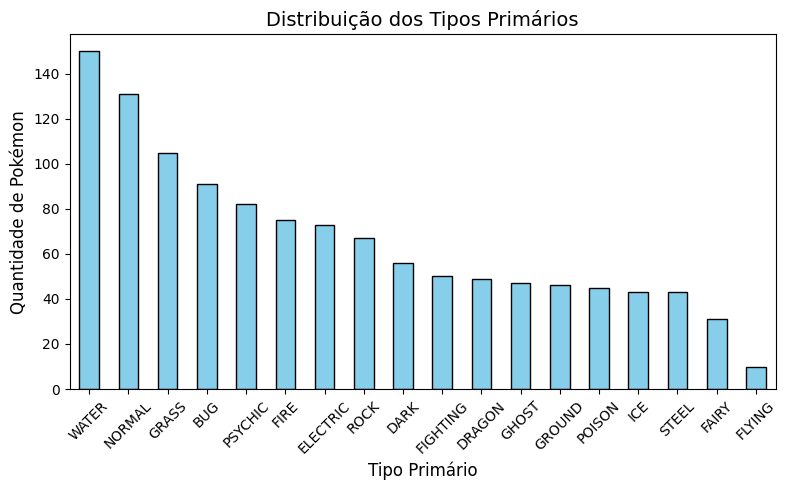

In [16]:
# 1. Distribuição dos tipos primários
df["Type 1"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribuição dos Tipos Primários")
plt.xlabel("Tipo Primário")
plt.ylabel("Quantidade de Pokémon")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

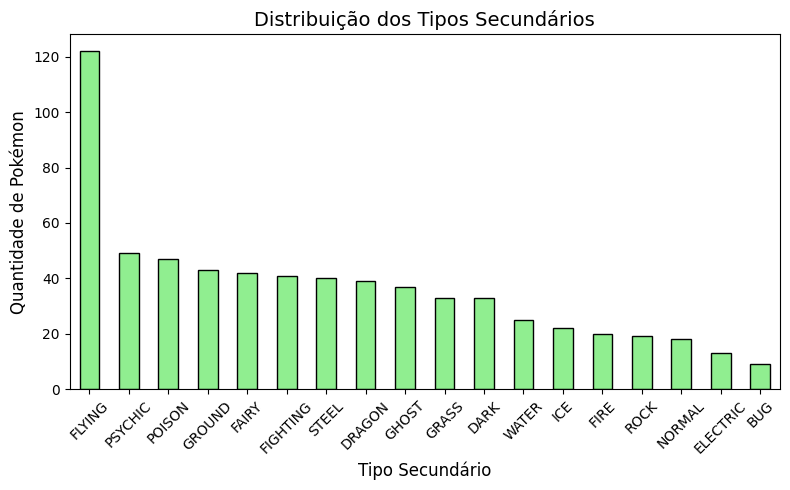

In [17]:
# 2. Distribuição dos tipos secundários (sem "-")
df[df["Type 2"] != "-"]["Type 2"].value_counts().plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Distribuição dos Tipos Secundários")
plt.xlabel("Tipo Secundário")
plt.ylabel("Quantidade de Pokémon")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

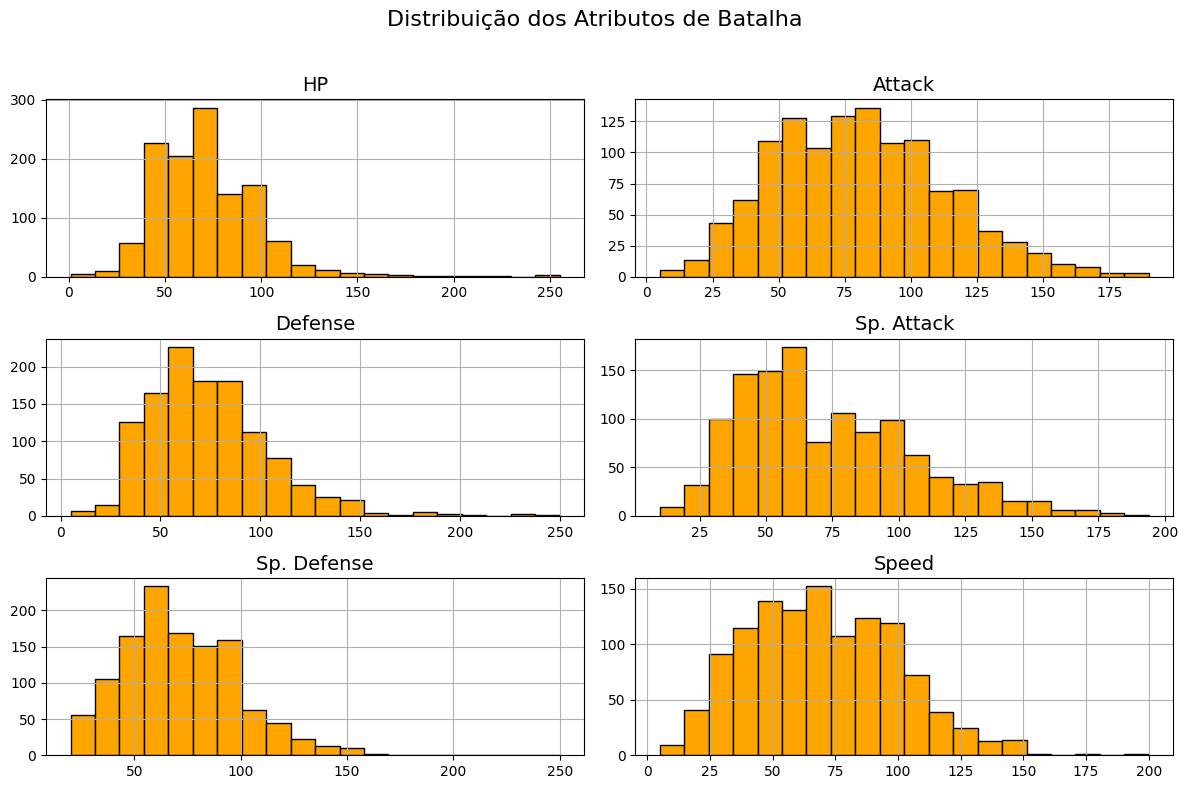

In [18]:
# 3. Histograma dos atributos de batalha (HP, Attack, Defense, etc.)
df[["HP", "Attack", "Defense", "Sp. Attack", "Sp. Defense", "Speed"]].hist(
    bins=20, edgecolor="black", color="orange", figsize=(12, 8)
)
plt.suptitle("Distribuição dos Atributos de Batalha", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

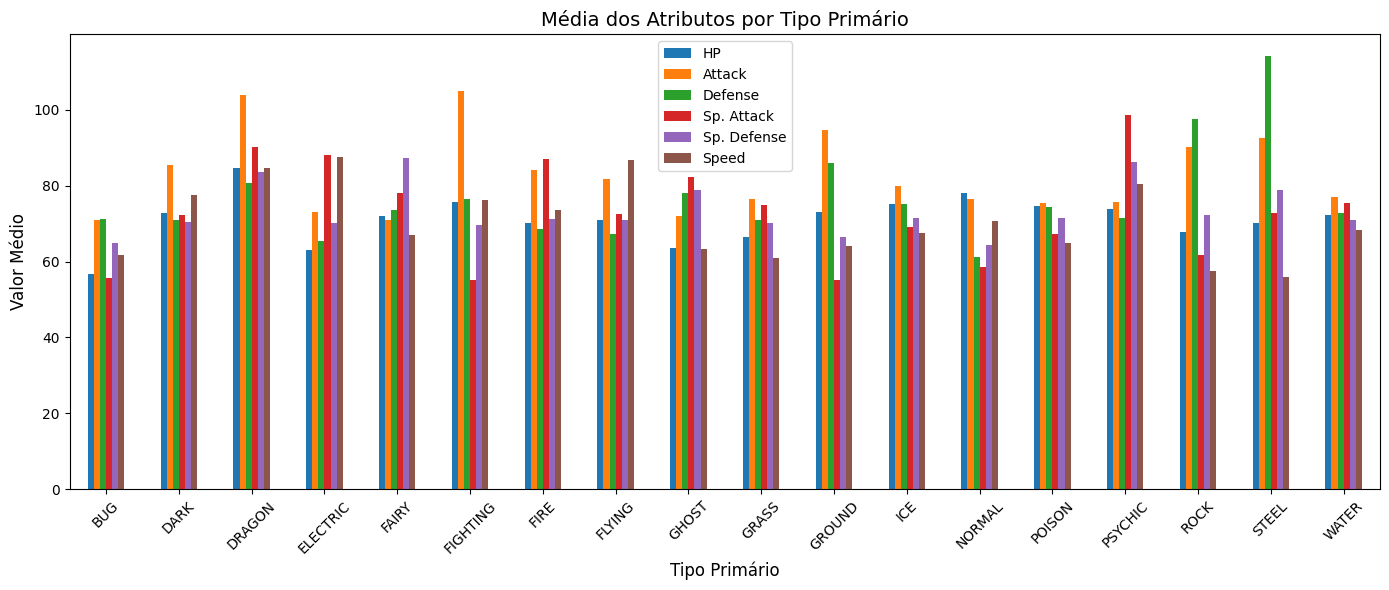

In [19]:
# 4. Comparação: média de stats por tipo primário
mean_stats_by_type = df.groupby("Type 1")[["HP", "Attack", "Defense", "Sp. Attack", "Sp. Defense", "Speed"]].mean()
mean_stats_by_type.plot(kind="bar", figsize=(14, 6))
plt.title("Média dos Atributos por Tipo Primário")
plt.xlabel("Tipo Primário")
plt.ylabel("Valor Médio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

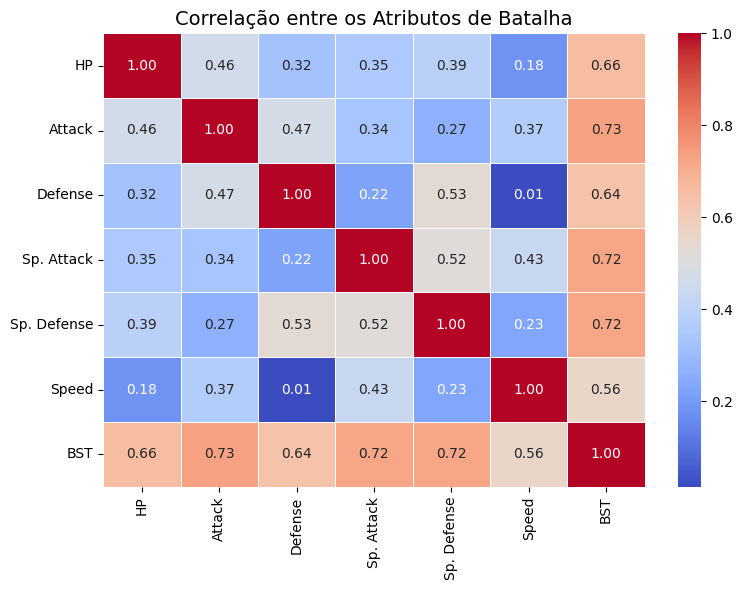

In [21]:
# 5. Matriz de correlação dos atributos numéricos
stats_corr = df[["HP", "Attack", "Defense", "Sp. Attack", "Sp. Defense", "Speed", "BST"]].corr()

# Heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(stats_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre os Atributos de Batalha")
plt.tight_layout()
plt.show()